#                             ML AND DL TRAINING PROJECT

### Mehul Madaan - 42651202818
### Aniket Kumar   - 42051202818
### Chirag Keshri   - 35451202818


## Topic: Model that predicts whether someone will pay back their loan based on historical information

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Importing all the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [3]:
start_df = pd.read_csv('loan.csv', low_memory=False)

In [4]:
df = start_df.copy(deep=True)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [7]:
df.info

<bound method DataFrame.info of          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0       NaN        NaN       2500         2500           2500.0   36 months   
1       NaN        NaN      30000        30000          30000.0   60 months   
2       NaN        NaN       5000         5000           5000.0   36 months   
3       NaN        NaN       4000         4000           4000.0   36 months   
4       NaN        NaN      30000        30000          30000.0   60 months   
...      ..        ...        ...          ...              ...         ...   
2260663 NaN        NaN      12000        12000          12000.0   60 months   
2260664 NaN        NaN      12000        12000          12000.0   60 months   
2260665 NaN        NaN      10000        10000          10000.0   36 months   
2260666 NaN        NaN      12000        12000          12000.0   60 months   
2260667 NaN        NaN      16550        16550          16550.0   60 months   

         int_rate  

In [8]:
print(f"{df.dtypes}\n")

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object



### Data Cleaning

As we can see there are a lot of NULL Values and Columns, we will be cleaning the data before performimg Exploratory Data Analysis

In [9]:
# Find the count and percentage of missing values
df_na = pd.DataFrame({'Percent': 100*df.isnull().sum()/len(df), 'Count': df.isnull().sum()})

# Print columns with null count > 0
df_na[df_na['Count'] > 0]

,Percent,Count
id,100.000000,2260668
member_id,100.000000,2260668
emp_title,7.385826,166969
emp_length,6.498389,146907
annual_inc,0.000177,4
...,...,...
settlement_status,98.537777,2227612
settlement_date,98.537777,2227612
settlement_amount,98.537777,2227612
settlement_percentage,98.537777,2227612


In [11]:
df=df.dropna(axis=1,thresh=int(0.75*len(df)))

In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [18]:
#NULL values in each column
for col in df.columns:
    print("{}:{}".format(col,df[col].isnull().sum()))

loan_amnt:0
funded_amnt:0
funded_amnt_inv:0
term:0
int_rate:0
installment:0
grade:0
sub_grade:0
emp_title:166969
emp_length:146907
home_ownership:0
annual_inc:4
verification_status:0
issue_d:0
loan_status:0
pymnt_plan:0
purpose:0
title:23325
zip_code:1
addr_state:0
dti:1711
delinq_2yrs:29
earliest_cr_line:29
inq_last_6mths:30
open_acc:29
pub_rec:29
revol_bal:0
revol_util:1802
total_acc:29
initial_list_status:0
out_prncp:0
out_prncp_inv:0
total_pymnt:0
total_pymnt_inv:0
total_rec_prncp:0
total_rec_int:0
total_rec_late_fee:0
recoveries:0
collection_recovery_fee:0
last_pymnt_d:2426
last_pymnt_amnt:0
last_credit_pull_d:73
collections_12_mths_ex_med:145
policy_code:0
application_type:0
acc_now_delinq:29
tot_coll_amt:70276
tot_cur_bal:70276
total_rev_hi_lim:70276
acc_open_past_24mths:50030
avg_cur_bal:70346
bc_open_to_buy:74935
bc_util:76071
chargeoff_within_12_mths:145
delinq_amnt:29
mo_sin_old_il_acct:139071
mo_sin_old_rev_tl_op:70277
mo_sin_rcnt_rev_tl_op:70277
mo_sin_rcnt_tl:70276
mort_a

In [19]:
#Creating a Dataset for only with Columns which help in prediction
df = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership', 'issue_d', 'pymnt_plan'
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status', 'zip_code', 'avg_cur_bal', 'revol_bal'])

In [20]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,verification_status,purpose,dti,delinq_2yrs,loan_status,zip_code,avg_cur_bal,revol_bal
0,2500,36 months,13.56,84.92,C,C1,10+ years,RENT,Dec-2018,Not Verified,debt_consolidation,18.24,0.0,Current,109xx,1878.0,4341
1,30000,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,Dec-2018,Source Verified,debt_consolidation,26.52,0.0,Current,713xx,24763.0,12315
2,5000,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,Dec-2018,Source Verified,debt_consolidation,10.51,0.0,Current,490xx,18383.0,4599
3,4000,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,Dec-2018,Source Verified,debt_consolidation,16.74,0.0,Current,985xx,30505.0,5468
4,30000,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,Dec-2018,Not Verified,debt_consolidation,26.35,0.0,Current,212xx,9667.0,829


In [21]:
df.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
issue_d                 object
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
zip_code                object
avg_cur_bal            float64
revol_bal                int64
dtype: object

In [22]:
df['term']=df['term'].map(lambda x: x.lstrip(' ').rstrip('months'))

In [25]:
# Remove string characters in 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [26]:
# Remove string characters in 'zipcode' column
df['zip_code'] = df['zip_code'].str.replace(r'\D', '')

In [28]:
df.dropna(axis=0)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,verification_status,purpose,dti,delinq_2yrs,loan_status,zip_code,avg_cur_bal,revol_bal
0,2500,36,13.56,84.92,C,C1,10,RENT,Dec-2018,Not Verified,debt_consolidation,18.24,0.0,Current,109,1878.0,4341
1,30000,60,18.94,777.23,D,D2,10,MORTGAGE,Dec-2018,Source Verified,debt_consolidation,26.52,0.0,Current,713,24763.0,12315
2,5000,36,17.97,180.69,D,D1,6,MORTGAGE,Dec-2018,Source Verified,debt_consolidation,10.51,0.0,Current,490,18383.0,4599
3,4000,36,18.94,146.51,D,D2,10,MORTGAGE,Dec-2018,Source Verified,debt_consolidation,16.74,0.0,Current,985,30505.0,5468
4,30000,60,16.14,731.78,C,C4,10,MORTGAGE,Dec-2018,Not Verified,debt_consolidation,26.35,0.0,Current,212,9667.0,829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260662,30000,60,30.75,984.47,F,F5,6,MORTGAGE,Oct-2017,Verified,debt_consolidation,22.13,0.0,Current,338,19423.0,19206
2260663,12000,60,14.08,279.72,C,C3,10,MORTGAGE,Oct-2017,Not Verified,debt_consolidation,20.88,0.0,Current,054,4110.0,9592
2260664,12000,60,25.82,358.01,E,E4,1,MORTGAGE,Oct-2017,Not Verified,debt_consolidation,19.28,3.0,Fully Paid,971,34640.0,3497
2260665,10000,36,11.99,332.10,B,B5,10,OWN,Oct-2017,Source Verified,debt_consolidation,12.96,0.0,Current,603,31623.0,7094


In [ ]:
df=df.drop(['emp_length'],axis=1)
df=df.drop(['avg_cur_bal'],axis=1)

In [37]:
df=df.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)

In [38]:
#NULL values in each column
for col in df.columns:
    print("{}:{}".format(col,df[col].isnull().sum()))

loan_amnt:0
term:0
int_rate:0
installment:0
grade:0
sub_grade:0
home_ownership:0
purpose:0
dti:1711
loan_status:0
zip_code:1
revol_bal:0


In [39]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,purpose,dti,loan_status,zip_code,revol_bal
0,2500,36,13.56,84.92,C,C1,RENT,debt_consolidation,18.24,Current,109,4341
1,30000,60,18.94,777.23,D,D2,MORTGAGE,debt_consolidation,26.52,Current,713,12315
2,5000,36,17.97,180.69,D,D1,MORTGAGE,debt_consolidation,10.51,Current,490,4599
3,4000,36,18.94,146.51,D,D2,MORTGAGE,debt_consolidation,16.74,Current,985,5468
4,30000,60,16.14,731.78,C,C4,MORTGAGE,debt_consolidation,26.35,Current,212,829


### Exploratory Data Analysis

In [41]:
# Set a new variable for the purpose of displaying the value counts of 'loan_status'
loan_status_vis = df['loan_status'].value_counts()

Text(0.5, 0, 'Count')

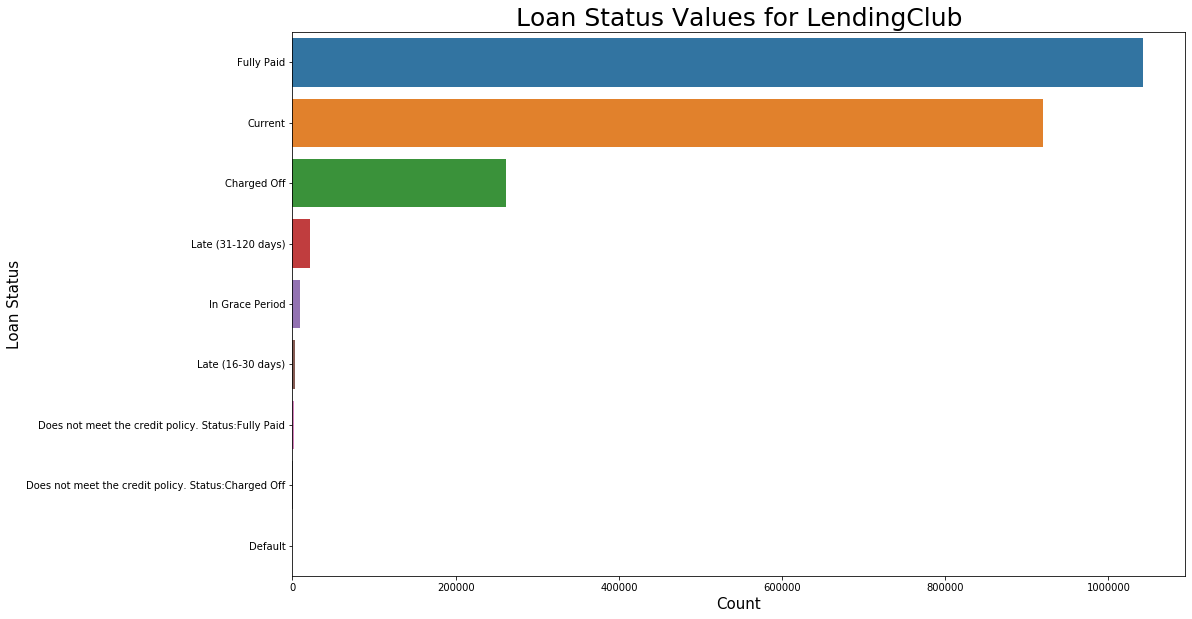

In [44]:
plt.figure(figsize=(16,10))
sns.barplot(x=loan_status_vis,y=loan_status_vis.index,data=df)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

Text(0.5, 0, 'Count')

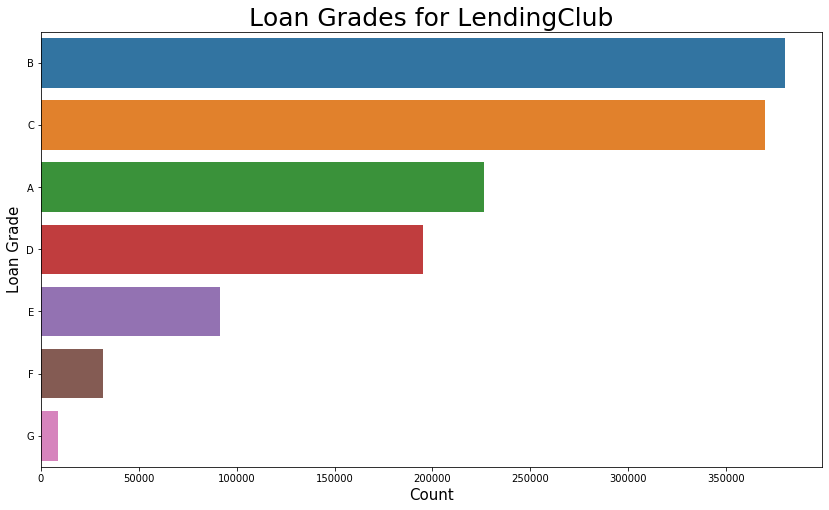

In [184]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df['grade'].value_counts()
# Plot the value counts

# Plot the value counts
plt.figure(figsize=(14,8))
sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

Here is a simple count plot for loan grades within the dataset. The most popular grades are B and C. A-graded loans come third. There are few F and G graded loans, probably for the best. However it is important to notice that B and C graded loans occur more often than top rated 'A' loans.

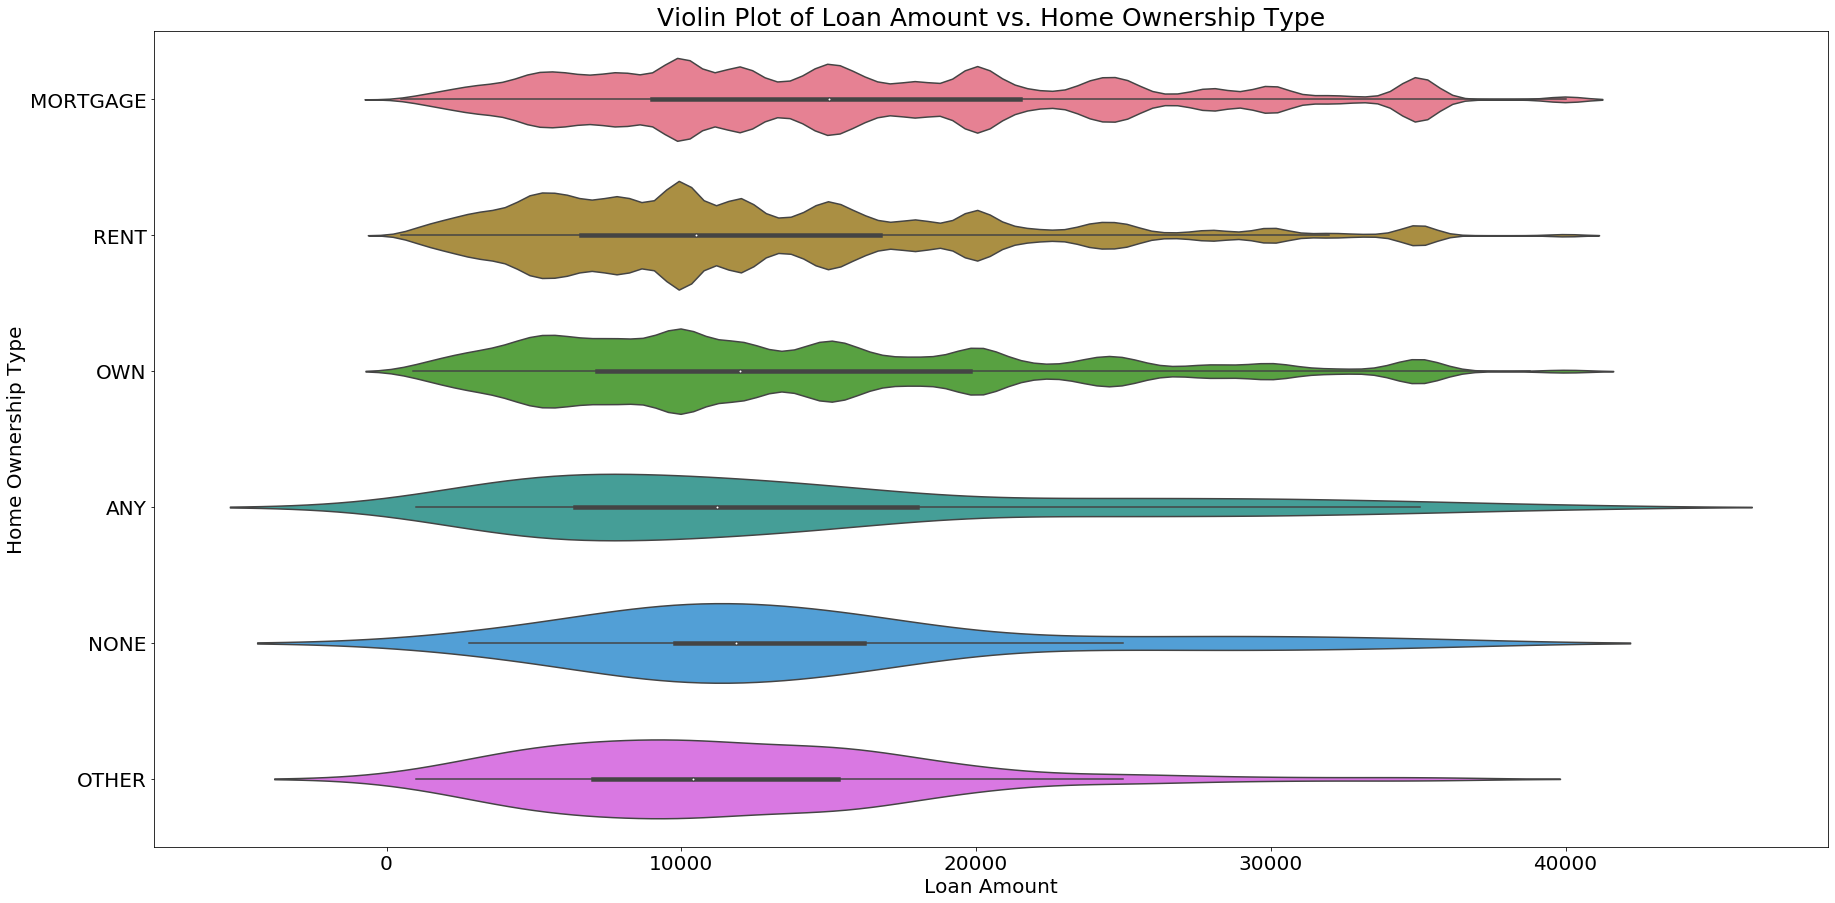

In [182]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=df, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

This plot identified the mean and density distribution for loan amounts per home-ownership type. Borrowers can be categorized into seven ownership types. Borrowers with mortgages have the highest average loan amount and those who rent have the lowest loan amount for analytical categories.

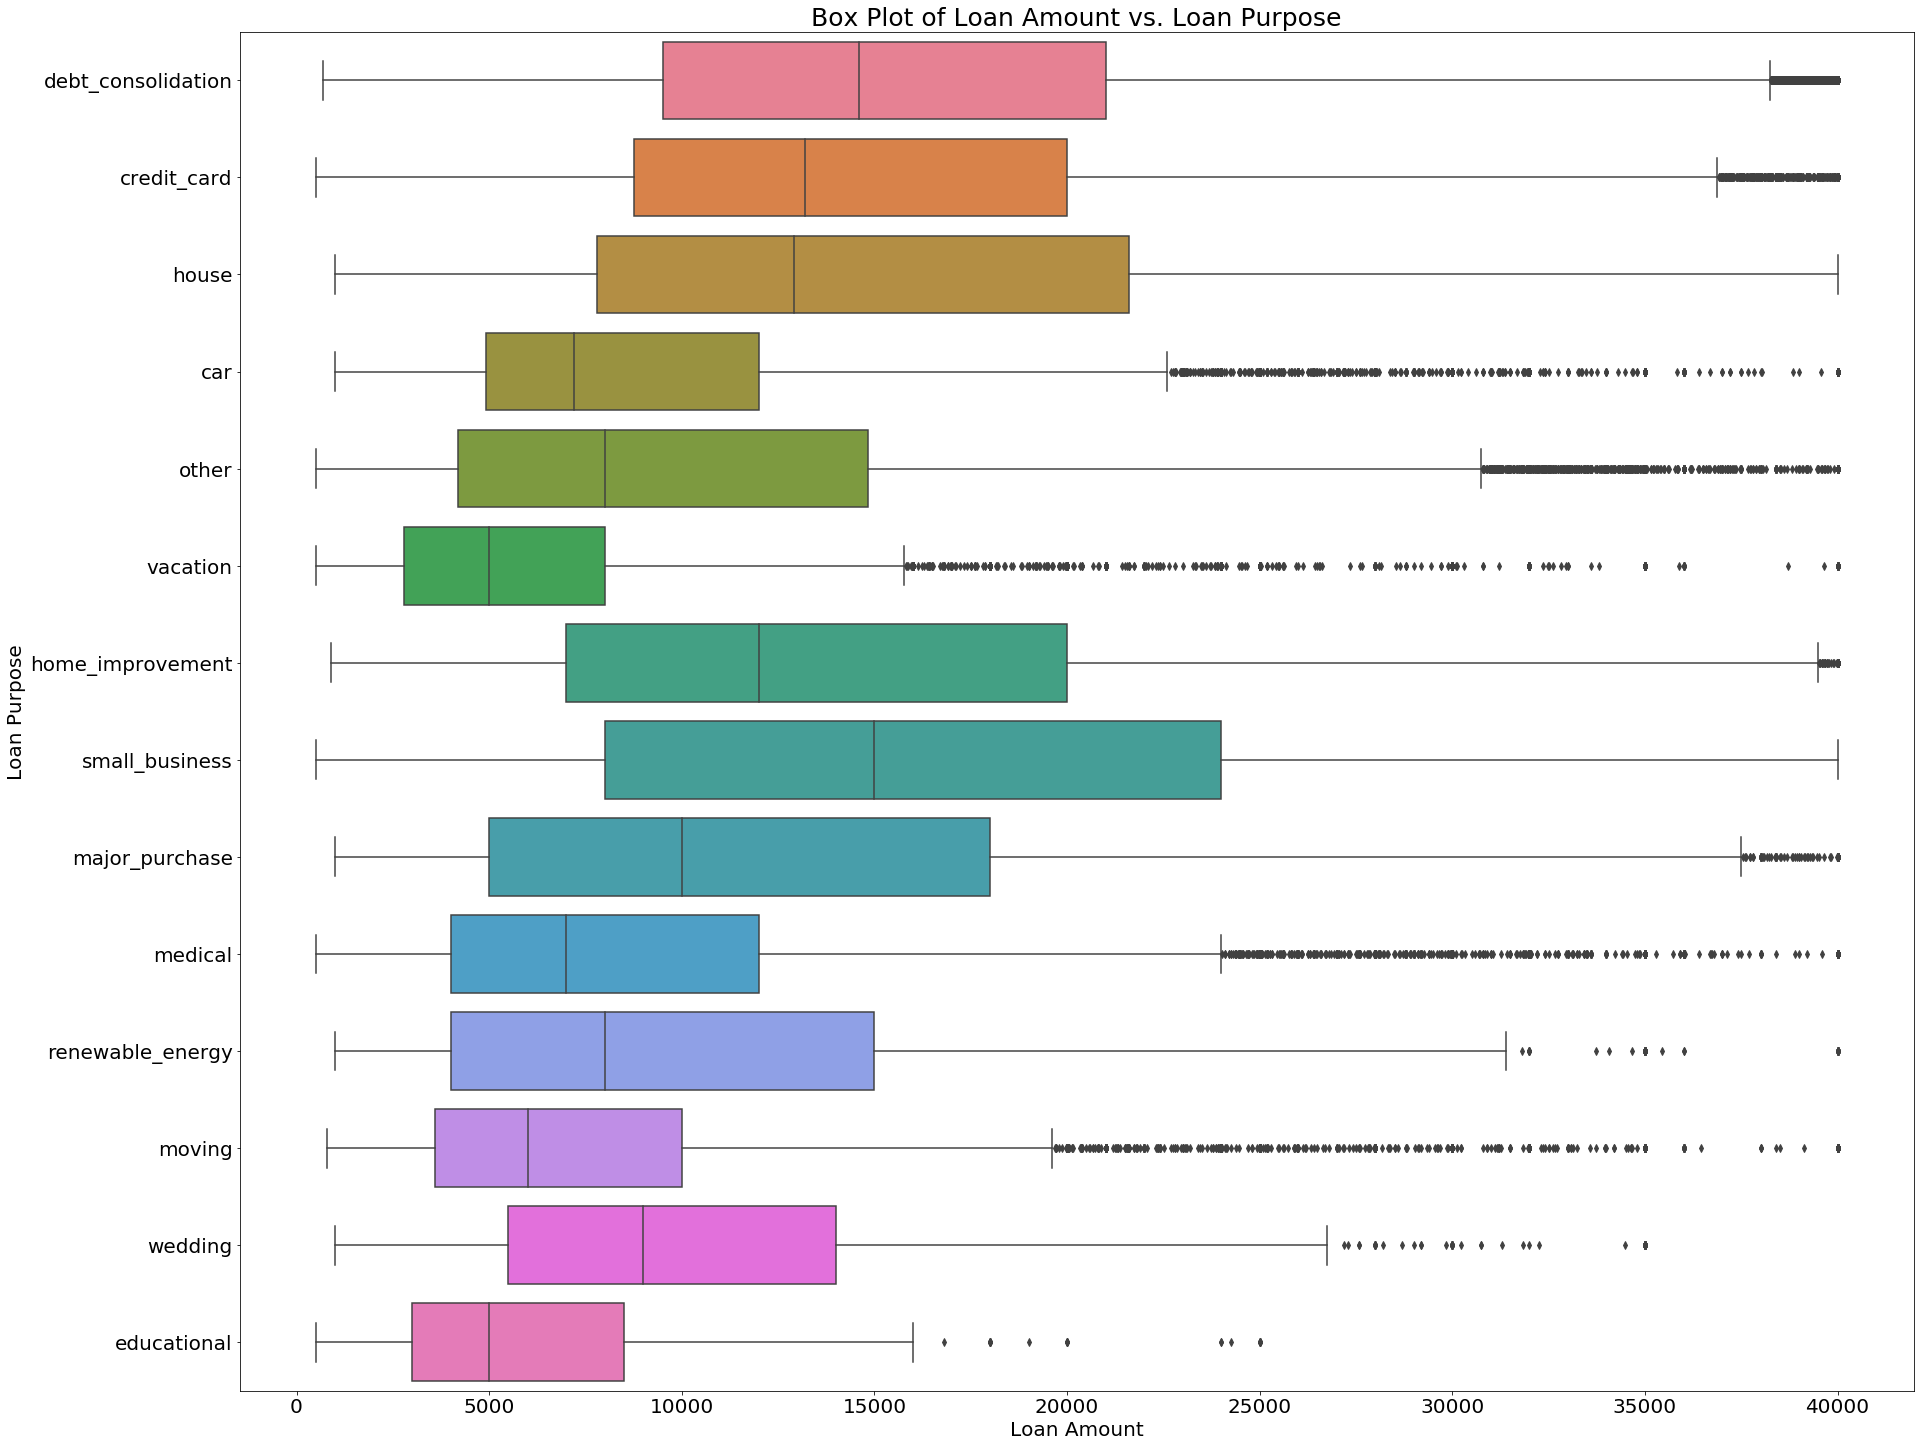

In [46]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=df, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

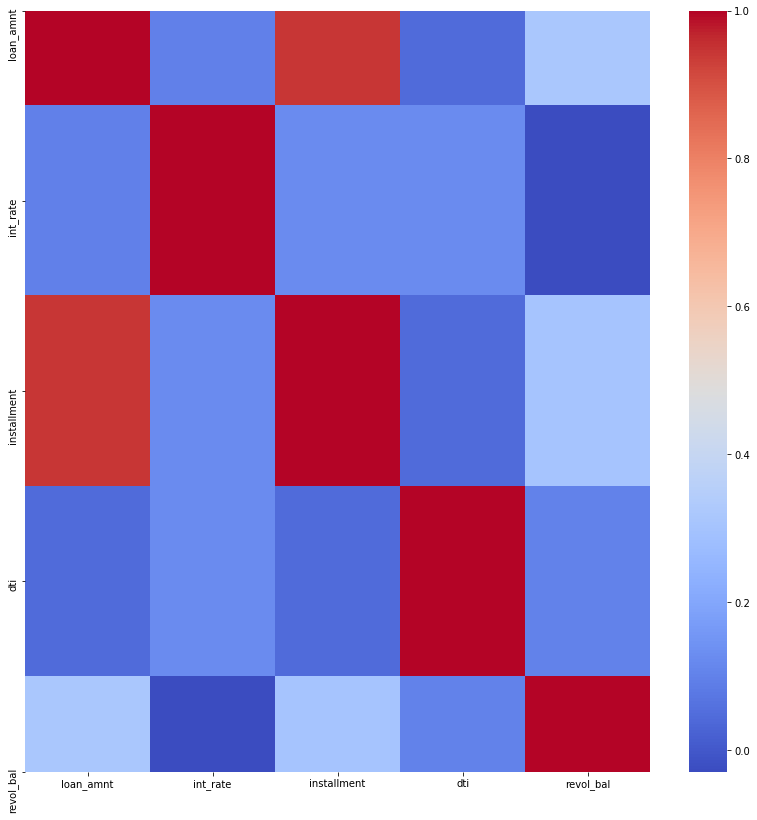

In [47]:

# Set correlation variable
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

There is a strong correlation between installment values and loan amount. This multicollinearity should be removed in the following model because these two values explain the data in the same manner. We would be overfitting the model if both of these features are contained in the final model. Most machine learning models carry assumptions which calls for little multicollinearity.

In [ ]:
df=df.drop(['installment'],axis=1)

In [60]:

df = df[df.loan_status != 'Current']
df = df[df.loan_status != 'In Grace Period']
df = df[df.loan_status != 'Late (16-30 days)']
df = df[df.loan_status != 'Late (31-120 days)']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df = df[df.loan_status != 'Issued']
# Combining charged off and defaulted columns
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'})
df['loan_status'].value_counts()

Fully Paid    1041952
Default        261686
Name: loan_status, dtype: int64

In [77]:
## Using Dummy Variables to categorize loan_status column
df_copy=pd.get_dummies(df, columns=['loan_status'])
df_copy.columns


Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'purpose', 'dti', 'zip_code', 'revol_bal', 'loan_status_Default',
       'loan_status_Fully Paid'],
      dtype='object')

In [78]:
df_copy.drop('loan_status_Fully Paid',axis=1)

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,purpose,dti,zip_code,revol_bal,loan_status_Default
100,30000,36,22.35,D,D5,MORTGAGE,debt_consolidation,30.46,917,15603,0
152,40000,60,16.14,C,C4,MORTGAGE,credit_card,50.53,456,34971,0
170,20000,36,7.56,A,A3,MORTGAGE,credit_card,18.92,982,25416,0
186,4500,36,11.31,B,B3,RENT,credit_card,4.64,786,4472,0
215,8425,36,27.27,E,E5,MORTGAGE,credit_card,12.37,020,36812,0
...,...,...,...,...,...,...,...,...,...,...,...
2260654,30000,60,17.09,D,D1,RENT,debt_consolidation,23.22,112,19224,1
2260655,18000,60,30.65,F,F4,MORTGAGE,debt_consolidation,8.08,799,10100,1
2260656,17950,60,30.17,F,F3,MORTGAGE,debt_consolidation,33.24,600,5959,0
2260658,15000,60,16.02,C,C5,RENT,debt_consolidation,14.66,119,6988,0


In [121]:
df_copy2=df_copy
df_copy2 = pd.get_dummies(df_copy2, drop_first=True)
df_copy2

,loan_amnt,int_rate,dti,revol_bal,loan_status_Default,loan_status_Fully Paid,term_60,grade_B,grade_C,grade_D,...,zip_code_990,zip_code_991,zip_code_992,zip_code_993,zip_code_994,zip_code_995,zip_code_996,zip_code_997,zip_code_998,zip_code_999
100,30000,22.35,30.46,15603,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,40000,16.14,50.53,34971,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
170,20000,7.56,18.92,25416,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,4500,11.31,4.64,4472,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
215,8425,27.27,12.37,36812,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260654,30000,17.09,23.22,19224,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2260655,18000,30.65,8.08,10100,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2260656,17950,30.17,33.24,5959,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2260658,15000,16.02,14.66,6988,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df_copy2=df_copy2.drop('loan_status_Fully Paid',axis=1)

### Modelling

We will be using 2 techniques that will be used for Modelling:


    1.) Decision Trees
    2.) Random Forests

We will be further comparing the efficiency of the 2 Models and further implying which of them is more suitable in the current scenario

In [135]:
## Working on a seperate copy so as to avoid pollution of Data
df_copy3=df_copy
df_copy3.dtypes

loan_amnt                   int64
term                       object
int_rate                  float64
grade                      object
sub_grade                  object
home_ownership             object
purpose                    object
dti                       float64
zip_code                   object
revol_bal                   int64
loan_status_Default         uint8
loan_status_Fully Paid      uint8
dtype: object

In [138]:
df_copy3=df_copy3.drop(['zip_code','grade','sub_grade'],axis=1)

In [139]:
df_copy3

,loan_amnt,term,int_rate,home_ownership,purpose,dti,revol_bal,loan_status_Default,loan_status_Fully Paid
100,30000,36,22.35,MORTGAGE,debt_consolidation,30.46,15603,0,1
152,40000,60,16.14,MORTGAGE,credit_card,50.53,34971,0,1
170,20000,36,7.56,MORTGAGE,credit_card,18.92,25416,0,1
186,4500,36,11.31,RENT,credit_card,4.64,4472,0,1
215,8425,36,27.27,MORTGAGE,credit_card,12.37,36812,0,1
...,...,...,...,...,...,...,...,...,...
2260654,30000,60,17.09,RENT,debt_consolidation,23.22,19224,1,0
2260655,18000,60,30.65,MORTGAGE,debt_consolidation,8.08,10100,1,0
2260656,17950,60,30.17,MORTGAGE,debt_consolidation,33.24,5959,0,1
2260658,15000,60,16.02,RENT,debt_consolidation,14.66,6988,0,1


In [140]:

df_copy3 = pd.get_dummies(df_copy3, drop_first=True)

In [144]:
df_copy3=df_copy3.drop('loan_status_Fully Paid',axis=1)


In [155]:
df_copy3.dtypes

loan_amnt                       int64
int_rate                      float64
dti                           float64
revol_bal                       int64
loan_status_Default             uint8
term_60                         uint8
home_ownership_MORTGAGE         uint8
home_ownership_NONE             uint8
home_ownership_OTHER            uint8
home_ownership_OWN              uint8
home_ownership_RENT             uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_house                   uint8
purpose_major_purchase          uint8
purpose_medical                 uint8
purpose_moving                  uint8
purpose_other                   uint8
purpose_renewable_energy        uint8
purpose_small_business          uint8
purpose_vacation                uint8
purpose_wedding                 uint8
dtype: object

### Importing Machine Learning Libraries

In [149]:
from sklearn.model_selection import train_test_split
X=df_copy3.drop('loan_status_Default',axis=1)
y=df_copy3['loan_status_Default']

Splitting data into Training and Test

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dtree=DecisionTreeClassifier()

In [162]:
X_train=X_train.fillna(X_train.mean())

In [163]:
X_test=X_test.fillna(X_test.mean())

#### Fitting the Model and Predicting on Test Data

In [164]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [165]:
pred = dtree.predict(X_test)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix

In [169]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    312588
           1       0.27      0.29      0.28     78504

    accuracy                           0.70    391092
   macro avg       0.54      0.55      0.54    391092
weighted avg       0.71      0.70      0.70    391092



[[251026  61562]
 [ 55850  22654]]


(0.0, 2.0, 2.0, 0.0)

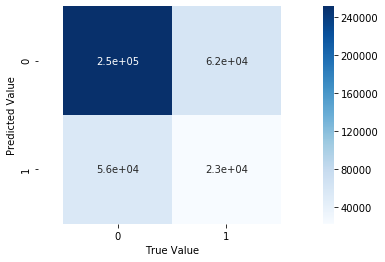

In [180]:
b=confusion_matrix(y_test,pred)
print(b)
ax = sns.heatmap(b, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

## Now Using Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rfc= RandomForestClassifier(n_estimators=100)

In [174]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
rfc_pred=rfc.predict(X_test)

#### Now Plotting Confusion Matrix and Classification Report

In [176]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88    312588
           1       0.44      0.11      0.18     78504

    accuracy                           0.79    391092
   macro avg       0.63      0.54      0.53    391092
weighted avg       0.74      0.79      0.74    391092



(0.0, 2.0, 2.0, 0.0)

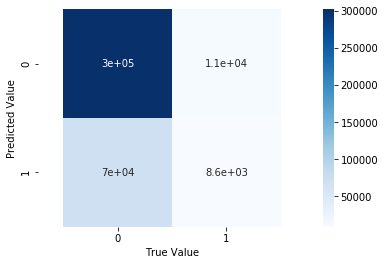

In [181]:
d=confusion_matrix(y_test,rfc_pred)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

# Conclusion

The aim of this project was to explore, analyze and build a machine learning algorithm for the purpose of correctly identifying whether a person, given certain characteristics, has a high likelihood to default on a loan. This type of model could be used by LendingClub to identify certain financial traits of future borrowers that could have the potential to default and not pay back their loan.


The Random Forest Classifier provides us with an accuracy of 79% while the Decision Tree Method provides us with an Accuracy of 70%. Hence, the Random Forest appears to be a better technique for such kind of Data.

# Recommendations

LendingClub must be careful when identifying potential borrowers who fit certain criteria. For example, borrowers who do not own a home and are applying for a small business or wedding loan, this could be a negative combination that results in the borrower defaulting on a future loan.


Looking into the distribution plot from data exploration, borrowers who end up defaulting on their loan are continuously paying higher interest rates and larger installments. LendingClub should be weary of not combining these two metrics, especially if potential borrowers are applying for a 'non-so likely' loan purpose (such as educational or medical).


LendingClub must be aware that low graded loans, undeniably, have a higher chance of default probability. They should be willing to work with these borrowers to ensure they are making adequate and timely payments. Possibly reducing interest rates or installments for these clients could help.

# Further Work

One of the drawbacks is simply the limited number of people who defaulted on their loan in the 8 years of data (2007-2015). We could use an updated data frame which consists of the next 3 years values (2015-2018) and see how many of the current loans were paid off, defaulted, or even charged off. Then, these new data points can be used for prediction or and training new models.


Since the algorithm puts some of the non-defaulters in the default class, we might want to look further into this issue to help the model accurately predict capable borrowers.